In [1]:
%pylab inline
from pandas import DataFrame
from wallet.util.analysis import Analysis, _optimize, _moving_average_statistics
equity = {'SCHG':60,'SCHF':18,'SCHE':12,'SCHA':10}
income = {'SCHQ':40,'SCHP':30,'IAU':20,'SCHH':10}
direxion = {'TMF':70,'SPXL':30}
symbols = [*equity, *income, *direxion,'UVXY']

Populating the interactive namespace from numpy and matplotlib


In [ ]:
########################################

In [2]:
ana = Analysis(symbols, 21, 5)
print(ana)
ana.screen()

from 2020-07-31 to 2020-09-04 - 11 symbols


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
SPXL,21.0,0.790867,0.834025,-1.431151,-0.571149,0.936037,1.827076,1.936894,0.938737,14.509245,12.527165,-0.896107
SCHG,21.0,0.354646,0.397889,-0.667564,-0.255081,0.466753,0.803376,0.949971,0.871372,5.804917,5.994156,-0.830955
SCHF,21.0,0.134792,0.250969,-0.274416,-0.180540,0.118802,0.527502,0.528560,0.505464,4.266495,2.190003,0.047527
SCHA,21.0,0.101928,0.346469,-0.560967,-0.313779,0.039102,0.690302,0.923165,0.271285,2.434726,4.013202,0.546046
SCHE,21.0,0.079936,0.282214,-0.466812,-0.336221,0.072869,0.502401,0.571093,0.255124,2.576735,2.499075,-0.064996
SCHH,21.0,0.056553,0.282575,-0.541517,-0.326672,0.032535,0.553363,0.632980,0.172048,0.601743,3.265855,0.235330
SCHP,21.0,0.022936,0.089926,-0.162617,-0.136820,0.051975,0.126920,0.138205,0.166798,0.367329,0.972282,-0.606998
UVXY,21.0,0.219276,2.538453,-3.135329,-2.930089,-0.767874,3.492248,6.829312,0.083255,0.998004,21.836325,1.012676
IAU,21.0,-0.156236,0.607578,-1.300458,-1.148939,-0.064287,0.530477,0.907324,-0.270208,-2.120899,7.661078,-0.349342


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Portfolio,21.0,0.133512,0.227163,-0.240061,-0.22107,0.174038,0.457387,0.462272,0.552801,2.191423,3.075264,-0.212389
Portfolio-RB,21.0,0.133512,0.227163,-0.240061,-0.22107,0.174038,0.457387,0.462272,0.552801,2.191423,3.075264,-0.212389


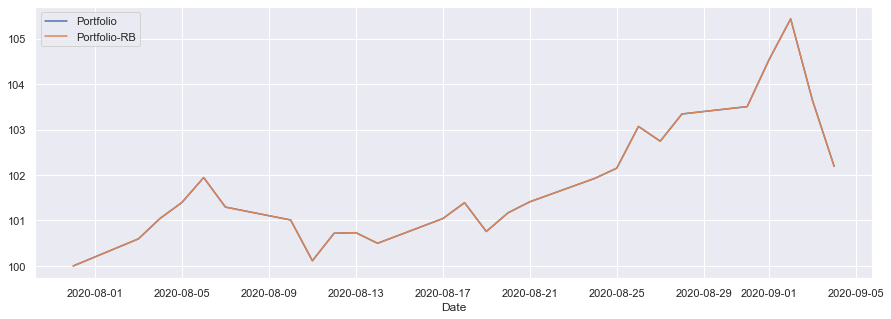

In [3]:
ana.graph({
  **{k:v*.60 for k,v in equity.items()},
  **{k:v*.36 for k,v in income.items()},
  'UVXY':4}, drop_components=True)

2020-08-12 rebalance: buy TMF,UVXY, sell SCHG,SCHF,SCHE,SCHA,SPXL


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Portfolio,21.0,0.126463,0.377719,-0.578544,-0.472784,0.193179,0.657684,0.754827,0.313795,1.054209,5.370744,-0.303703
Portfolio-RB,21.0,0.120920,0.380719,-0.591427,-0.492415,0.173688,0.630066,0.763622,0.296763,1.010647,5.221900,-0.268281


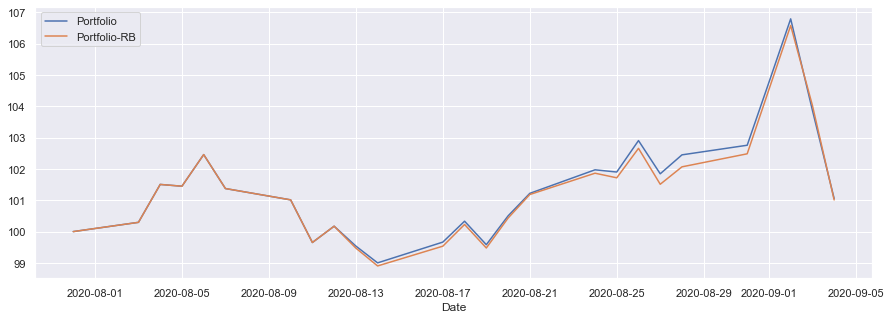

In [4]:
ana.graph({
  **{k:v*.60 for k,v in equity.items()},
  **{k:v*.36 for k,v in direxion.items()},
  'UVXY':4}, drop_components=True)

In [ ]:
########################################

In [5]:
ana = Analysis(symbols, 126, 21)
print(ana)
ana.screen()

from 2020-02-07 to 2020-09-04 - 11 symbols


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
IAU,126.0,0.150092,0.235558,-0.427390,-0.198892,0.133713,0.568032,0.672413,0.603483,23.066661,12.531179,0.212102
SCHQ,126.0,0.074299,0.209746,-0.268951,-0.198684,0.047484,0.451783,0.635861,0.316394,13.618497,14.767713,0.635174
SCHP,126.0,0.044889,0.119653,-0.385918,-0.164495,0.046695,0.274925,0.456993,0.308826,6.936508,10.848029,0.126937
SCHG,126.0,0.154775,0.580573,-1.722355,-1.211324,0.315195,0.719944,1.080714,0.252921,17.317363,32.392020,-1.706558
TMF,126.0,0.117610,0.576506,-0.971795,-0.729316,0.089353,1.068695,1.738781,0.190238,27.960808,43.823930,0.442364
SCHE,126.0,0.044347,0.556862,-1.606146,-1.195224,0.192760,0.578954,0.710092,0.065386,2.826072,31.399186,-1.625144
UVXY,126.0,0.186333,3.420322,-5.023603,-2.161294,-1.014111,8.939762,14.358194,0.052158,117.728051,82.301365,2.489534
SCHF,126.0,0.007602,0.591613,-1.835173,-1.414747,0.171892,0.629342,0.831287,-0.000565,-4.273529,34.179456,-1.676657
SCHA,126.0,0.000398,0.829502,-2.477942,-1.893212,0.257672,0.756145,1.022984,-0.009088,-6.558104,42.311680,-1.580080


2020-02-27 rebalance: buy SCHG,SCHF,SCHE,SCHA,SCHH, sell SCHQ,SCHP,IAU,UVXY
2020-03-19 rebalance: buy SCHG,SCHF,SCHE,SCHA,SCHP,IAU,SCHH, sell SCHQ,UVXY
2020-04-29 rebalance: buy SCHQ,SCHP,IAU,UVXY, sell SCHG,SCHF,SCHE,SCHA,SCHH
2020-06-03 rebalance: buy SCHQ,SCHP,IAU,UVXY, sell SCHG,SCHF,SCHE,SCHA,SCHH
2020-08-14 rebalance: buy SCHF,SCHQ,SCHP,SCHH,UVXY, sell SCHG,SCHE,SCHA,IAU


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Portfolio-RB,126.0,0.186967,0.168265,-0.299888,-0.130213,0.170869,0.526773,0.654962,1.063981,27.873497,7.034162,0.040452
Portfolio,126.0,0.088716,0.127106,-0.393682,-0.100235,0.076884,0.302746,0.587740,0.635534,13.915366,10.887672,0.279370


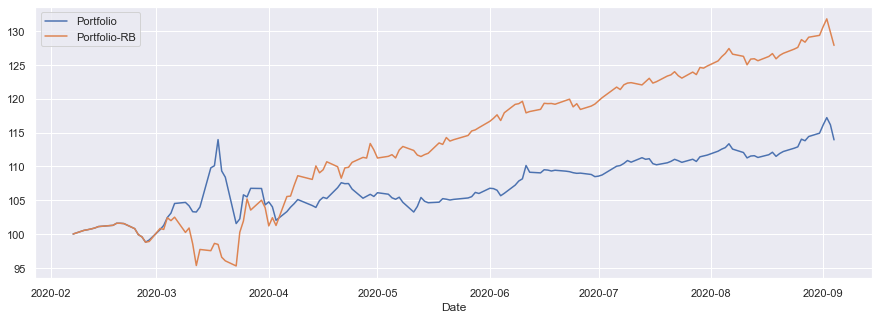

In [6]:
ana.graph({
  **{k:v*.60 for k,v in equity.items()},
  **{k:v*.36 for k,v in income.items()},
  'UVXY':4}, drop_components=True)

2020-02-24 rebalance: buy SCHG,SCHF,SCHE,SCHA,SPXL, sell TMF,UVXY
2020-03-16 rebalance: buy SCHG,SCHF,SCHE,SCHA,SPXL, sell TMF,UVXY
2020-04-06 rebalance: buy SCHE,SCHA,TMF,UVXY, sell SCHG,SCHF,SPXL
2020-04-28 rebalance: buy SCHF,SCHE,TMF,UVXY, sell SCHG,SCHA,SPXL
2020-05-19 rebalance: buy TMF,UVXY, sell SCHG,SCHF,SCHE,SCHA,SPXL
2020-06-10 rebalance: buy TMF,UVXY, sell SCHG,SCHF,SCHE,SCHA,SPXL
2020-07-09 rebalance: buy SCHG,SCHF,SCHA,SPXL,UVXY, sell SCHE,TMF
2020-08-11 rebalance: buy SCHE,TMF,UVXY, sell SCHG,SCHF,SCHA,SPXL
2020-09-01 rebalance: buy SCHF,SCHE,SCHA,TMF,UVXY, sell SCHG,SPXL


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Portfolio-RB,126.0,0.263375,0.233982,-0.316348,-0.068134,0.230687,0.736231,1.111891,1.091704,41.461541,12.493587,0.924015
Portfolio,126.0,0.091272,0.156232,-0.358191,-0.203603,0.105487,0.320809,0.505649,0.533409,15.010100,10.040843,-0.204341


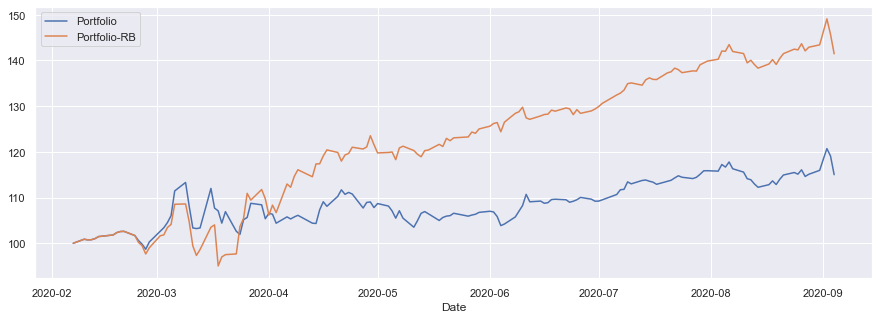

In [7]:
ana.graph({
  **{k:v*.60 for k,v in equity.items()},
  **{k:v*.36 for k,v in direxion.items()},
  'UVXY':4}, drop_components=True)

In [ ]:
########################################

In [11]:
schwab = [
    'SCHK','SCHB','SCHX','SCHD','SCHM','SCHA','SCHG','SCHV','SCHH',
    'SCHF','SCHC','SCHE','SCHZ','SCHP','SCHO','SCHR','SCHQ','IAU',
]

In [12]:
ana = Analysis(schwab, 21, 5)
ana.screen()

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
SCHX,21.0,0.277127,0.271913,-0.454373,-0.174816,0.299191,0.608149,0.641955,0.989990,5.061195,4.230098,-0.942129
SCHK,21.0,0.271488,0.272443,-0.466374,-0.167314,0.285941,0.603644,0.640881,0.967363,4.947107,4.312058,-0.930743
SCHB,21.0,0.262282,0.274134,-0.490711,-0.195900,0.289076,0.574257,0.629407,0.927814,4.750261,4.304359,-1.033860
SCHG,21.0,0.354646,0.397889,-0.667564,-0.255081,0.466753,0.803376,0.949971,0.871372,5.804917,5.994156,-0.830955
SCHC,21.0,0.161996,0.229027,-0.296953,-0.104149,0.188841,0.446674,0.666541,0.672668,4.726686,2.428062,0.057678
SCHD,21.0,0.216685,0.385896,-0.379387,-0.293378,0.105657,0.809131,0.838469,0.540946,5.211966,2.237788,0.166629
SCHV,21.0,0.164053,0.298157,-0.281067,-0.279580,0.097591,0.550465,0.636748,0.523605,3.819444,2.023333,0.021652
SCHF,21.0,0.134792,0.250969,-0.274416,-0.180540,0.118802,0.527502,0.528560,0.505464,4.266495,2.190003,0.047527
SCHM,21.0,0.118063,0.292100,-0.477195,-0.297088,0.132474,0.530919,0.587628,0.377017,2.188063,3.943572,-0.250087


In [13]:
ana = Analysis(schwab, 126, 21)
ana.screen()

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
IAU,126.0,0.150092,0.235558,-0.427390,-0.198892,0.133713,0.568032,0.672413,0.603483,23.066661,12.531179,0.212102
SCHR,126.0,0.035990,0.056582,-0.040954,-0.017796,0.014198,0.156943,0.223159,0.495793,6.094219,2.208140,1.505525
SCHQ,126.0,0.074299,0.209746,-0.268951,-0.198684,0.047484,0.451783,0.635861,0.316394,13.618497,14.767713,0.635174
SCHP,126.0,0.044889,0.119653,-0.385918,-0.164495,0.046695,0.274925,0.456993,0.308826,6.936508,10.848029,0.126937
SCHO,126.0,0.015541,0.027188,-0.008214,-0.003370,0.004146,0.084194,0.098012,0.279711,2.579248,0.349250,1.899165
SCHG,126.0,0.154775,0.580573,-1.722355,-1.211324,0.315195,0.719944,1.080714,0.252921,17.317363,32.392020,-1.706558
SCHZ,126.0,0.031439,0.118407,-0.345298,-0.147805,0.031196,0.262007,0.481461,0.198492,4.958322,10.269212,0.661977
SCHX,126.0,0.069798,0.592115,-1.876825,-1.349303,0.254522,0.648586,1.027472,0.104476,4.789469,34.332965,-1.677691
SCHK,126.0,0.067323,0.596327,-1.907560,-1.376819,0.248165,0.653041,1.039045,0.099587,4.395214,34.795671,-1.682246


2020-03-06 rebalance: buy SCHG,SCHP, sell SCHQ,IAU
2020-04-03 rebalance: buy SCHG, sell SCHQ,SCHP,IAU
2020-04-27 rebalance: buy SCHQ,SCHP,IAU, sell SCHG
2020-06-08 rebalance: buy SCHQ,SCHP,IAU, sell SCHG


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
IAU,126.0,0.150092,0.235558,-0.427390,-0.198892,0.133713,0.568032,0.672413,0.603483,23.066661,12.531179,0.212102
Portfolio-RB,126.0,0.114830,0.198317,-0.537967,-0.238007,0.111311,0.412828,0.685449,0.539003,16.451425,13.347456,-0.521375
Portfolio,126.0,0.106454,0.188384,-0.524999,-0.225945,0.099511,0.389840,0.649465,0.522959,15.234757,13.093274,-0.498714
SCHQ,126.0,0.074299,0.209746,-0.268951,-0.198684,0.047484,0.451783,0.635861,0.316394,13.618497,14.767713,0.635174
SCHP,126.0,0.044889,0.119653,-0.385918,-0.164495,0.046695,0.274925,0.456993,0.308826,6.936508,10.848029,0.126937
SCHG,126.0,0.154775,0.580573,-1.722355,-1.211324,0.315195,0.719944,1.080714,0.252921,17.317363,32.392020,-1.706558


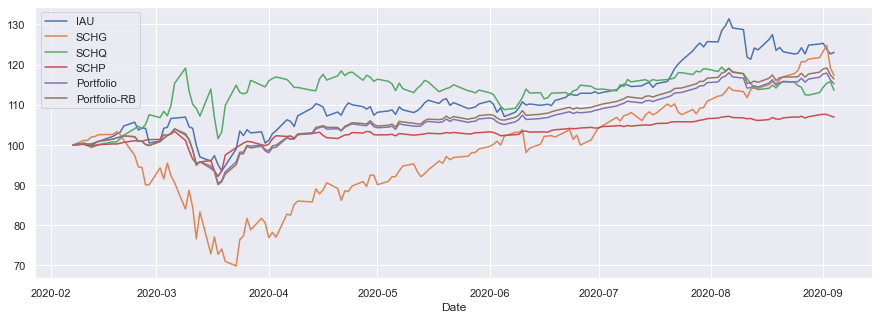

In [14]:
ana.graph({'SCHG':25,'SCHQ':25,'SCHP':25,'IAU':25})

In [ ]:
########################################

In [ ]:
ana.setup_mask([*equity, *income])
start = ana.data.index[0]
data = {col: ana.data[col] * (100 / ana.data[col][start]) for col in ana.data.columns}
data['Equity'] = sum(data[st] * sh for st, sh in equity.items())
for col in equity.keys():
    del data[col]
data['Income'] = sum(data[st] * sh for st, sh in income.items())
for col in diversification.keys():
    del data[col]
frame = DataFrame(data)
print(_optimize(frame.rolling(5).mean().pct_change() * 100, .008, True, False))
_moving_average_statistics(frame, 5, .008)

In [ ]:
ana.setup_mask([*equity, *direxion])
start = ana.data.index[0]
data = {col: ana.data[col] * (100 / ana.data[col][start]) for col in ana.data.columns}
data['Equity'] = sum(data[st] * sh for st, sh in equity.items())
for col in equity.keys():
    del data[col]
data['Direxion'] = sum(data[st] * sh for st, sh in direxion.items())
for col in direxion.keys():
    del data[col]
frame = DataFrame(data)
print(_optimize(frame.rolling(5).mean().pct_change() * 100, .008, True, False))
_moving_average_statistics(frame, 5, .008)